In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


RNN(Recurrent Neural Network) - 순환 신경망  
RNN은 입력값(x), 출력값(output), 상태값(state), 가중치(w), 편향값(b) 그리고 활성화 함수(tanh)로 구성된다.

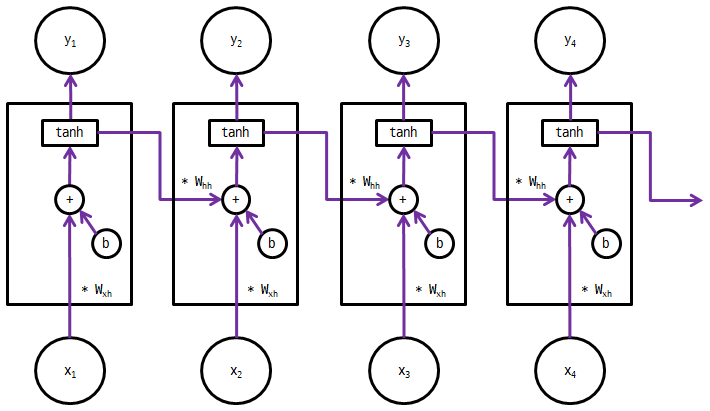

In [3]:
from IPython.display import Image
Image('rnn.png', width='800')

In [12]:
inputs = np.array([[[1, 2]]])
print(inputs.shape)
print(inputs.shape[0])
print('=' * 80)

# tf.reset_default_graph() 메소드로 현재 그래프에 이어 붙어서 동작하지 않도록 그래프를 초기화 한다.
tf.reset_default_graph()
tf.set_random_seed(35)

tf_inputs = tf.constant(inputs, dtype=tf.float32)
sess = tf.Session()
print('입력 데이터: {}'.format(sess.run(tf_inputs)))
print('=' * 80)

# BasicRNNCell() 메소드의 인수로 사용할 hidden_state 개수를 지정해서 RNN 셀을 만든다.
rnn_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=3)
print('RNN 셀의 개수: {}'.format(rnn_cell.state_size)) # RNN 셀의 개수
print('=' * 80)

# RNN 셀 초기화
initial_state = tf.random_normal(shape=(inputs.shape[0], rnn_cell.state_size), mean=1.0)
# dynamic_rnn() 메소드는 입력값과 RNN 셀을 받아 실행한 결과 값을 출력한다.
outputs, state = tf.nn.dynamic_rnn(cell=rnn_cell, dtype=tf.float32, inputs=tf_inputs, initial_state=initial_state)
print('출력값 개수: {}'.format(outputs))
print('상태값 개수: {}'.format(state))
print('=' * 80)

print('가중치 개수와 편향값 개수')
for v in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES):
    print(v)
print('=' * 80)

variable_names = [v.name for v in tf.trainable_variables()]
# for name in variable_names:
    # print(name)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output_run, state_run = sess.run([outputs, state])
    print('출력값\n{}\n'.format(output_run))
    print('상태값\n{}\n'.format(state_run))
    print('가중치와 편향값')
    values = sess.run(variable_names)
    for k, v in zip(variable_names, values):
        print('{}\n{}'.format(k, v))

(1, 1, 2)
1
입력 데이터: [[[1. 2.]]]
RNN 셀의 개수: 3
출력값 개수: Tensor("rnn/transpose_1:0", shape=(1, 1, 3), dtype=float32)
상태값 개수: Tensor("rnn/while/Exit_3:0", shape=(1, 3), dtype=float32)
가중치 개수와 편향값 개수
<tf.Variable 'rnn/basic_rnn_cell/kernel:0' shape=(5, 3) dtype=float32_ref>
<tf.Variable 'rnn/basic_rnn_cell/bias:0' shape=(3,) dtype=float32_ref>
출력값
[[[-0.86154586 -0.69077307 -0.66940147]]]

상태값
[[-0.86154586 -0.69077307 -0.66940147]]

가중치와 편향값
rnn/basic_rnn_cell/kernel:0
[[-0.60581434  0.04554379 -0.05184728]
 [-0.5220578  -0.54527855  0.1978231 ]
 [-0.36936402 -0.3568974  -0.26499468]
 [ 0.6830124  -0.75265324 -0.7705655 ]
 [ 0.00107181  0.50031275 -0.33132648]]
rnn/basic_rnn_cell/bias:0
[0. 0. 0.]


RNN 셀의 출력값과 상태값이 동일하다.  
입력값이 1 * 2 행렬이고 RNN의 상태값이 1 * 3 행렬일 경우 가중치는 총 5개의 행을 가지게 된다.  
입력값이 1 * 2 행렬이고 RNN의 상태값이 1 * 3 행렬일 경우 편향값은 총 3개가 필요하다.